<a href="https://colab.research.google.com/github/majiy4/pengolahan-citra-digital/blob/main/pengolahan_citra_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving R.png to R (4).png


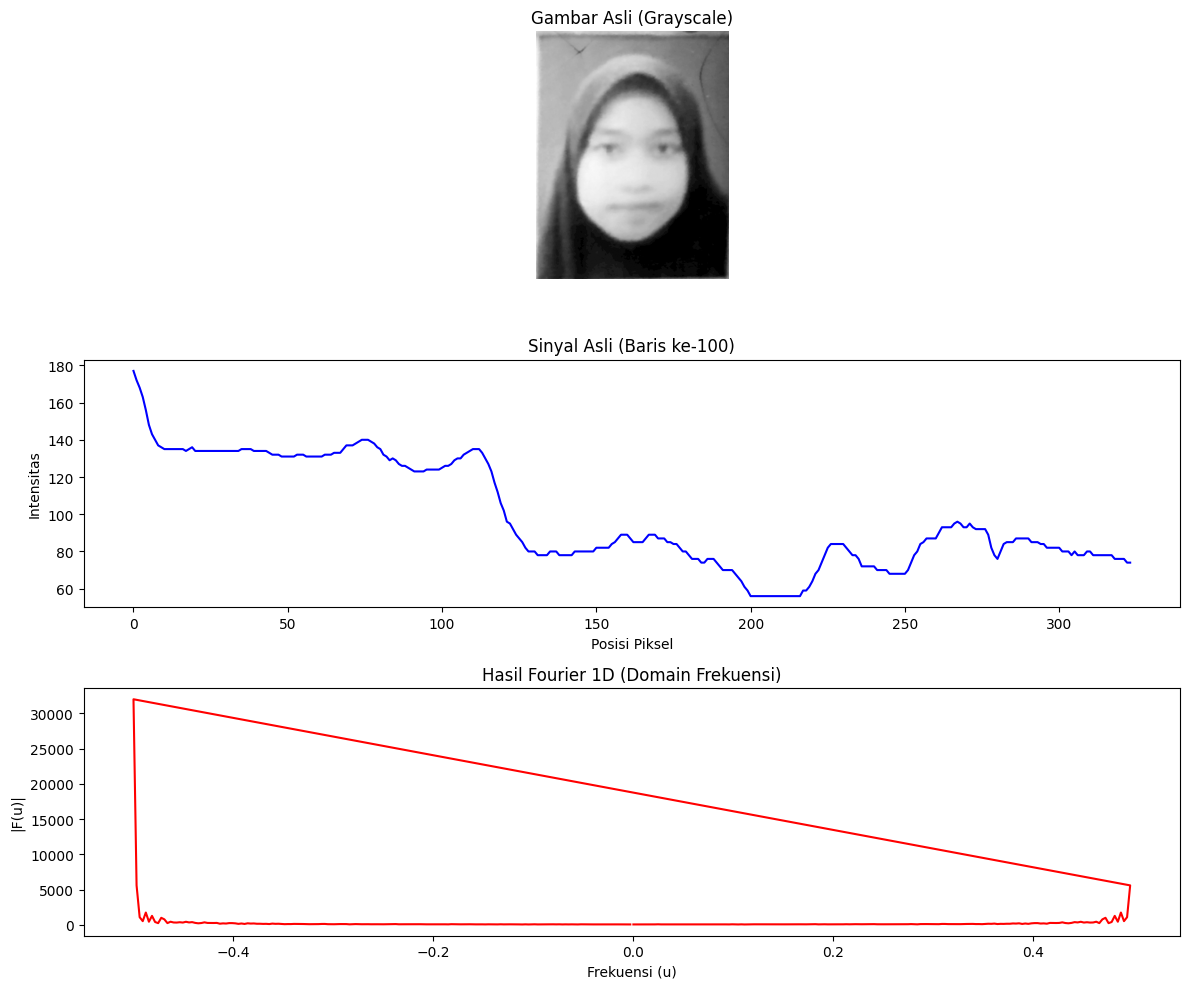

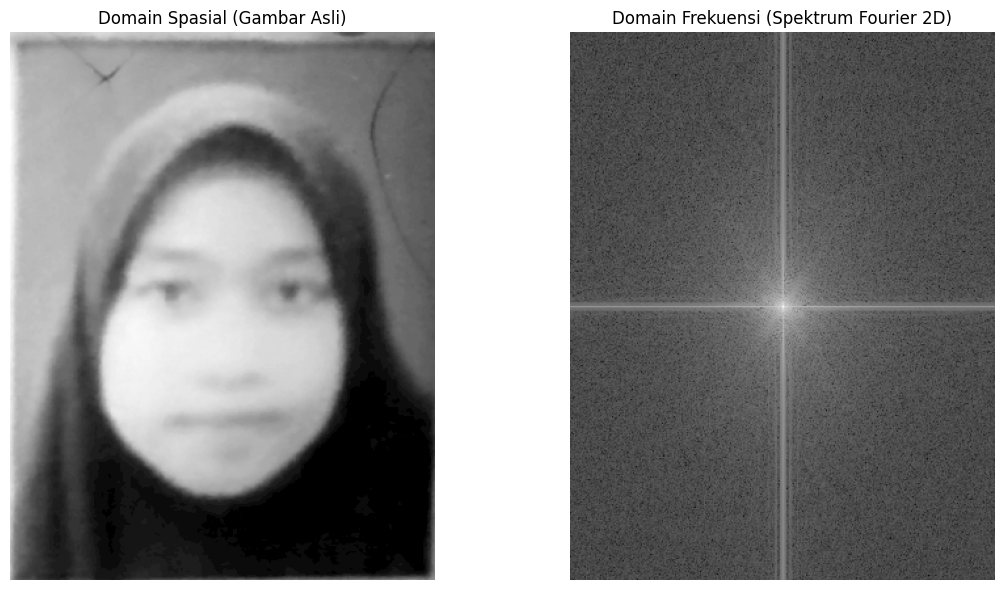

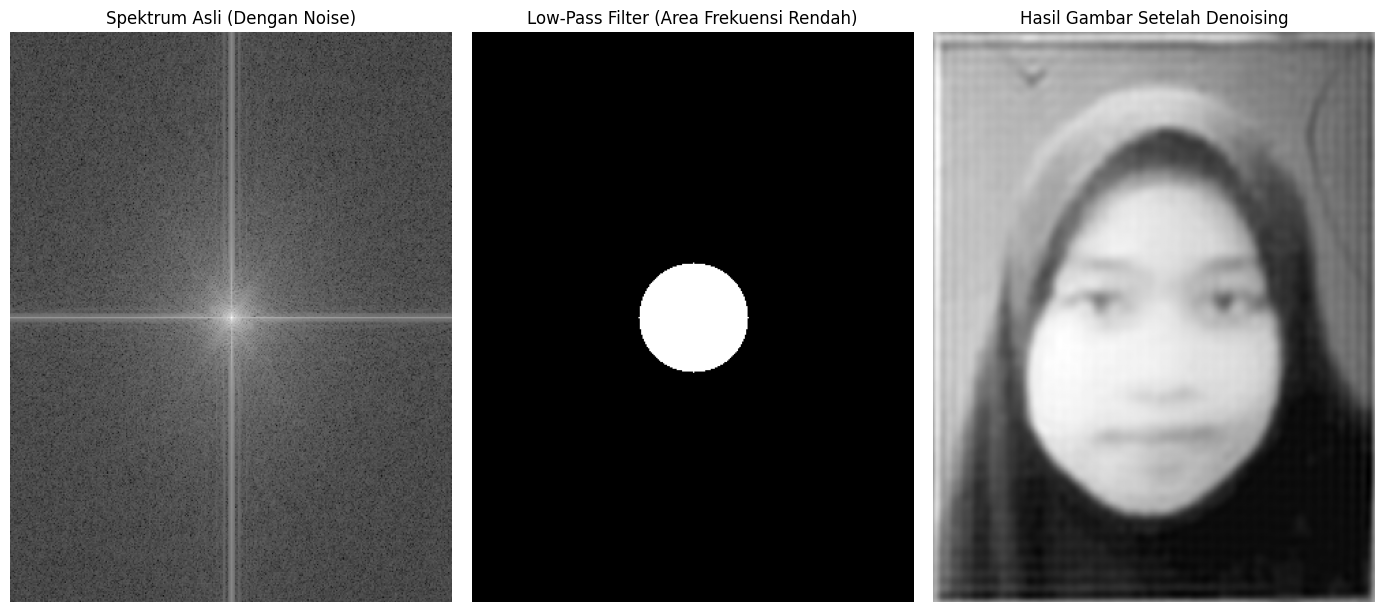

In [16]:
# --- Import library ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# --- 1. Upload gambar ---
uploaded = files.upload()  # pilih file tomat.jpg atau tomat.png

# --- 2. Baca gambar grayscale ---
img = cv2.imread('R.png', 0)

if img is None:
    raise FileNotFoundError("⚠️ Gambar tidak ditemukan. Pastikan nama file sesuai hasil upload.")

# ============================================================
# BAGIAN 1️⃣ : FOURIER 1D (baris ke-100)
# ============================================================

row_index = min(100, img.shape[0]-1)  # aman kalau gambar <100 baris
row = img[row_index, :]

# Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# Tampilkan hasil Fourier 1D
plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
plt.imshow(img, cmap='gray')
plt.title("Gambar Asli (Grayscale)")
plt.axis('off')

plt.subplot(3,1,2)
plt.plot(row, color='blue')
plt.title(f"Sinyal Asli (Baris ke-{row_index})")
plt.xlabel("Posisi Piksel")
plt.ylabel("Intensitas")

plt.subplot(3,1,3)
plt.plot(freq, magnitude, color='red')
plt.title("Hasil Fourier 1D (Domain Frekuensi)")
plt.xlabel("Frekuensi (u)")
plt.ylabel("|F(u)|")

plt.tight_layout()
plt.show()

# ============================================================
# BAGIAN 2️⃣ : FOURIER 2D (seluruh gambar)
# ============================================================

# Transformasi Fourier 2D
F2 = np.fft.fft2(img)
Fshift2 = np.fft.fftshift(F2)
magnitude2 = 20 * np.log(np.abs(Fshift2) + 1)

# Visualisasi Domain Spasial vs Frekuensi 2D
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Domain Spasial (Gambar Asli)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitude2, cmap='gray')
plt.title("Domain Frekuensi (Spektrum Fourier 2D)")
plt.axis('off')

plt.tight_layout()
plt.show()

# ============================================================
# BAGIAN 3️⃣ : FILTERING UNTUK MENGHILANGKAN NOISE
# ============================================================

# Langkah 1: Transformasi Fourier 2D lagi (kalau mau pakai hasil sebelumnya juga boleh)
F2 = np.fft.fft2(img)
Fshift2 = np.fft.fftshift(F2)

# Langkah 2: Buat filter lingkaran (low-pass filter)
rows, cols = img.shape
crow, ccol = rows//2, cols//2   # titik tengah frekuensi

# buat mask ukuran sama dengan gambar
mask = np.zeros((rows, cols), np.uint8)

# radius area frekuensi rendah yang dipertahankan
radius = 40  # bisa kamu ubah-ubah buat lihat efeknya
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

# Langkah 3: Terapkan mask ke domain frekuensi
Fshift_filtered = Fshift2 * mask

# Langkah 4: Kembalikan ke domain spasial (gambar hasil filter)
F_ishift = np.fft.ifftshift(Fshift_filtered)
img_filtered = np.fft.ifft2(F_ishift)
img_filtered = np.abs(img_filtered)

# Langkah 5: Visualisasi hasil
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(Fshift2)+1), cmap='gray')
plt.title("Spektrum Asli (Dengan Noise)")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask*255, cmap='gray')
plt.title("Low-Pass Filter (Area Frekuensi Rendah)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_filtered, cmap='gray')
plt.title("Hasil Gambar Setelah Denoising")
plt.axis('off')

plt.tight_layout()
plt.show()
